<a href="https://colab.research.google.com/github/Mario-U-KY/DataScience/blob/main/3_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b> 3. Linear Neaural Networks</b></h1>

뉴럴 네트워크에 들어가기 전에 뉴럴 네트워크 학습의 베이직한 부분들을 먼저 알아야 한다. 이는 간단한 뉴럴 네트워크의 구조 정의, 데이터 헨들링, loss 함수 명세화, 그리고 모델 트레이닝을 아우른다. Linear그리고 Softmax regression이 간단한 선형 뉴럴 네트워크의 일종으로 여겨지므로, 이로부터 기본을 정리해보자

<h1> 3.1 Linear Regression

선형회귀는 하나 혹은 하나 이상의 독립변수와 종속변수의 관계를 모델링하는 방법의 일종이다. 자연과학, 사회과학 측면에서는 이러한 선형회귀를 inputs과 outputs의 관계를 특정화(characterize)하는 것이 주 목적이지만, 머신러닝은 예측에 보다 더 초점이 맞춰져 있다.
Regression 문제는 수치값들을 예측할 때 주로 생각된다. 항상 고전 회귀문제만 다루는 것이 아니라, 분류 문제에도 적용될 수 있다.

<h2> 3.1.1 Basic Elements of Linear Regression 

선형회귀는 단순한 가정에서 시작됨. x, y 사이에는 관계가 있고, weighted sum으로 그 관계를 나타낼 수 있다. 또한 noise는 가우시안 분포를 따른다. 머신러닝에서 사용하는 데이터는 example로, 우리가 예측하고자 하는 것은 label 혹은 target이라고 부르며, 사용하는 독립변수는 features 혹은 covariates라고 부른다.

<h3>3.1.1.1 Linear Model

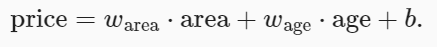

w는 가중치, b는 편향 (weight and bias)로 불린다. 가중치는 각 feature가 주는 influence를 나타내고, 편향은 y절편 즉 모든 feature값이 0 일 때의 숫자를 의미한다. 또한 모델 예측 값의 범위를 제한하기도 한다. 우리의 목적은 w와 b를 찾는 것. 머신러닝에서 주로 다차원의 변수를 다루므로 아래와 같은 vector notation이 보다 더 효과적이라고 할 수 있다.

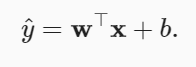

<h3>3.1.1.2. Loss Function

modeling을 하기 전에 우리는 measure of fitness를 결정해야한다. (무슨 기준으로 모델이 잘 fit 됐다고 할 수 있는지) loss function은 실제값과 예측값의 거리를 사용한다. loss값은 양수일 것이고, 작으면 작을 수록 좋다. 가장 유명한 loss function은 Squared Error이고 example i에 대해 아래와 같이 식으로 나타낼 수 있다.<br>
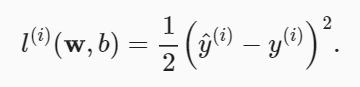

상수 1/2는 편의를 위해 사용, 미분 시 2가 나와서 서로 상쇄되도록 설정한 것. 알고리즘은 w,b에의해 결정되는 실제값, 예측값과의 차이 제곱을 평균한 값이 최소화되게끔 하는 w*, y*을 구하는 것이 된다.

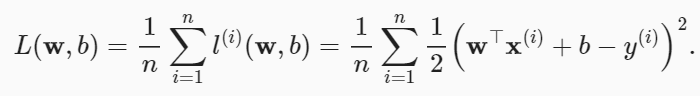

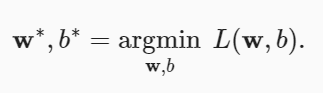

<h3>3.1.1.3. Analytic Solution



선형회귀는 간단한 최적화 문제로 풀이가 가능하다. b(bias)를 parameter w에 집어넣은 뒤, 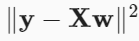
를 최소화 하는 문제를 풀면 된다. 이 식을 미분하고 0이되게끔 하는 w*를 구하는 방법으로 문제를 풀 수 있다. 미분하면 이와 같이 된다.
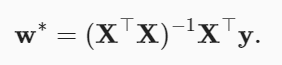

<h3>3.1.1.4. Minibatch Stochastic Gradient Descent

위와 같이 analytic하게 문제를 푸는 방법은 딥러닝의 세상에서 거의 일어나지 않는다. 대신 파라미터를 연속적으로 에러를 줄이는 방향으로 업데이트 해 나가는 방법인 gradient descent algorithm을 사용한다. loss값을 매 example마다 평균을 계산해야하므로 굉장히 시간이 오래걸리므로, 실제에서는 주로 examples로부터 minibatch를 샘플링하는 방법을 사용한다. 이를 minibatch stochastic gradient descent 라고 한다.

매 iteration마다 minibatch B를 렌덤하게 고정된 숫자로 학습 데이터셋으로 부터 뽑는다. 이를 바탕으로 avg loss의 미분값을 계산한다. 최종적으로 gradient들을 곱하여 그 값만큼 현재 파라미터를 빼주어 업데이트 한다.

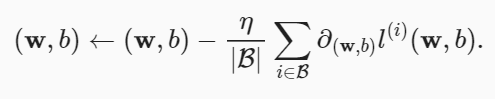

남은 이론 부분은 추후에 추가하도록 하겠다.<br>
https://d2l.ai/chapter_linear-networks/linear-regression.html

<h2>3.1.2. Vectorization for Speed


In [1]:
pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

모델을 학습하는데에 있어서, 모든 minibatches를 동시에 처리하길 원한다. 이를 효과적으로 하기 위해 계산을 벡터화 해서 선형대수 library를 사용하는 것이 python의 for-loops 사용보다 훨씬 낫다

In [3]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

running time 계산을 위해 timer를 써보자

In [4]:
class Timer: #@save
  """record multiple running times."""
  def __init__(self):
    self.times = []
    self.start()
  
  def start(self):
    """Start the timer."""
    self.tik = time.time()

  def stop(self):
    """Stop the timer and record the time in a list."""
    self.times.append(time.time() - self.tik)
    return self.times[-1]

  def avg(self):
    """Return the average time."""
    return sum(self.times) / len(self.times)

  def sum(self):
    """Return the sum of time."""
    return sum(self.times)

  def cumsum(self):
    """Return the accumulated time."""
    return np.array(self.times).cumsum().tolist()



In [5]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.11916 sec'

In [6]:
timer.start()
d = a+b
f'{timer.stop():.5f} sec'

'0.00021 sec'

for 문을 사용하는 방법보다 + 방법을 쓰는게 시간상 엄청나게 큰 차이를 준다.

<h2>3.1.3. The Normal Distribution and Squared Loss

선형회귀의 전제 중 하나인 noise 가 가우시안 분포를 따른다는 가정을 확인해보자

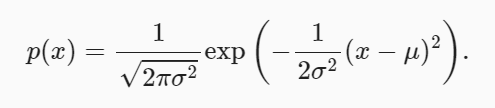

정규분포 계산을 위해 python 함수로는 다음과 같이 구현이 가능하다.

In [7]:
def normal(x, mu, sigma):
  p = 1/math.sqrt(2*math.pi *sigma**2)
  return p*np.exp(-0.5/sigma**2*(x-mu)**2)

이를 시각화 해보자

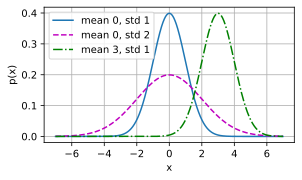

In [8]:
# Use numpy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

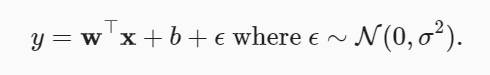

위의 식이 noise가 정규분포를 따라야 한다는 가정을 나타낸 것. 따라서 x가 주어졌을 때 y의 확률분포가 아래를 따라야 한다고 해석이 가능하다

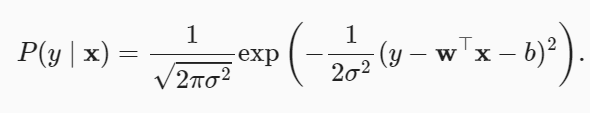

이후는 모두 이론내용이므로 원본을 읽자